# Breast Cancer Wisconsin Diagnostic Dataset
https://www.kaggle.com/datasets/utkarshx27/breast-cancer-wisconsin-diagnostic-dataset?resource=download

# Import Library

In [1]:
!pip install keras_tuner

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import multiprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix

warnings.filterwarnings('ignore')

# Import Data

In [3]:
# Direct link to the raw CSV on GitHub
url = "https://raw.githubusercontent.com/adisorn242/Deep-Learning-and-Reinforcement-Learning-2026-IBM-Course-/main/brca.csv"

# Load the dataset
df = pd.read_csv(url)

# Data Preparation

In [4]:
# Check column names and data types
print("\nColumn Information:")
print(df.info())


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se    

In [5]:
# Remove the first column by index
df = df.iloc[:, 1:]
df.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [6]:
# Check for any missing values
print(df.isnull().sum())

x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64


# EDA

Class Counts:
y
B    357
M    212
Name: count, dtype: int64


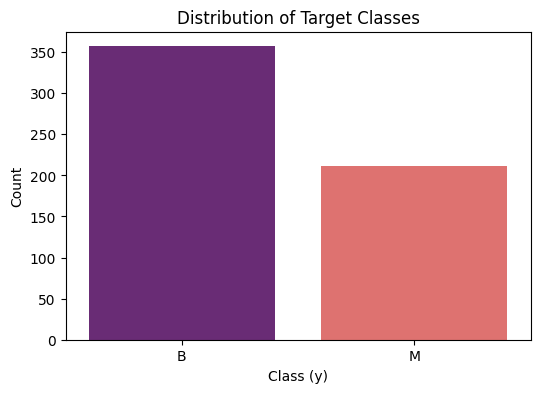

In [7]:
# 1. Show number of classes in column 'y'
class_counts = df['y'].value_counts()
print("Class Counts:")
print(class_counts)

# 2. Create Barplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y', palette='magma')
plt.title('Distribution of Target Classes')

# Adjust labels if your 'y' column uses M/B or 1/0
plt.xlabel('Class (y)')
plt.ylabel('Count')
plt.show()

In [8]:
# Encoding 'y' column: M -> 1, B -> 0
df['y'] = df['y'].map({'M': 1, 'B': 0})

# Verify the encoding
print("Encoded Target (y) First 5 rows:")
print(df['y'].head())

# Quick check on the distribution of 0s and 1s
print("\nNew Class Counts:")
print(df['y'].value_counts())

Encoded Target (y) First 5 rows:
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

New Class Counts:
y
0    357
1    212
Name: count, dtype: int64


In [9]:
# Generate descriptive statistics for all numerical features and the target
descriptive_stats = df.describe()

# Display the summary table
descriptive_stats.T

,count,mean,std,min,25%,50%,75%,max
x.radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
x.texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
x.perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
x.area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
x.smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
x.compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
x.concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
x.concave_pts_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
x.symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
x.fractal_dim_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
# Display grouped means and hypothesis test results formatted to 4 decimal places
from scipy import stats
import pandas as pd

# 1. Calculate the mean for each feature grouped by diagnosis (y) and transpose
grouped_stats = df.groupby('y').mean().T
grouped_stats.columns = ['Mean_Benign (0)', 'Mean_Malignant (1)']

# 2. Perform hypothesis testing (T-test and Mann-Whitney U) and collect p-values
t_pvals = []
mw_pvals = []
features = grouped_stats.index

for col in features:
    group0 = df[df['y'] == 0][col]
    group1 = df[df['y'] == 1][col]

    # T-test (Parametric)
    _, p_ttest = stats.ttest_ind(group0, group1, nan_policy='omit')
    t_pvals.append(p_ttest)

    # Mann-Whitney U test (Non-parametric)
    _, p_mw = stats.mannwhitneyu(group0, group1, alternative='two-sided')
    mw_pvals.append(p_mw)

# 3. Add p-values to the DataFrame
grouped_stats['T-test P-value'] = t_pvals
grouped_stats['Mann-Whitney P-value'] = mw_pvals

# 4. Display the results formatted to 4 decimal places without permanently rounding the data
grouped_stats.style.format("{:.4f}")

,Mean_Benign (0),Mean_Malignant (1),T-test P-value,Mann-Whitney P-value
x.radius_mean,12.1465,17.4628,0.0000,0.0000
x.texture_mean,17.9148,21.6049,0.0000,0.0000
x.perimeter_mean,78.0754,115.3654,0.0000,0.0000
x.area_mean,462.7902,978.3764,0.0000,0.0000
x.smoothness_mean,0.0925,0.1029,0.0000,0.0000
x.compactness_mean,0.0801,0.1452,0.0000,0.0000
x.concavity_mean,0.0461,0.1608,0.0000,0.0000
x.concave_pts_mean,0.0257,0.0880,0.0000,0.0000
x.symmetry_mean,0.1742,0.1929,0.0000,0.0000
x.fractal_dim_mean,0.0629,0.0627,0.7599,0.5372


# Train-Test Split

In [11]:
# Separate features (X) and target (y) then perform the train-test split

# Define X as all features and y as the encoded target
X = df.drop(columns=['y'])
y = df['y']

# Splitting the data: 80% for training and 20% for testing
# random_state is set to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the resulting shapes to verify the split
print(f"Total samples: {len(df)}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Total samples: 569
X_train shape: (455, 30), y_train shape: (455,)
X_test shape: (114, 30), y_test shape: (114,)


# Data Normalization

In [12]:
# Normalize the features to a range of [0, 1] using MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit only on the training data and transform both sets to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning

In [13]:
# Configure 8-core CPU strategy
strategy = tf.distribute.MirroredStrategy()

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 1, 2)):
        model.add(layers.Dense(
            units=hp.Choice(f'units_{i}', [16, 32, 64]),
            activation=hp.Choice(f'activation_{i}', ['relu', 'tanh', 'elu'])
        ))
        model.add(layers.Dropout(hp.Choice(f'dropout_{i}', [0.0, 0.2, 0.4])))

    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [14]:
class CVTuner(kt.Tuner):
    def run_trial(self, trial, x, y, epochs=1, batch_size=32, callbacks=None):
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        fold_final_accuracies = []
        y_arr = y.values if hasattr(y, 'values') else y

        for train_indices, val_indices in cv.split(x):
            x_train_f, x_val_f = x[train_indices], x[val_indices]
            y_train_f, y_val_f = y_arr[train_indices], y_arr[val_indices]

            with strategy.scope():
                model = self.hypermodel.build(trial.hyperparameters)

            hist = model.fit(
                x_train_f, y_train_f,
                validation_data=(x_val_f, y_val_f),
                epochs=epochs,
                batch_size=batch_size,
                callbacks=callbacks,
                verbose=0
            )

            # Use the accuracy from the VERY LAST epoch of this fold
            final_acc = hist.history['val_accuracy'][-1]
            fold_final_accuracies.append(final_acc)

        # Average the final accuracies across the 5 folds
        mean_cv_accuracy = np.mean(fold_final_accuracies)

        self.oracle.update_trial(trial.trial_id, {'val_accuracy': mean_cv_accuracy})
        print(f"Trial {trial.trial_id} Finished | Mean 5-Fold CV Accuracy: {mean_cv_accuracy:.4f}")

In [15]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=0
)

if False:
  with strategy.scope():
      tuner_cv = CVTuner(
          oracle=kt.oracles.RandomSearchOracle(
              objective='val_accuracy',
              max_trials=10,
              seed=42
          ),
          hypermodel=build_model,
          directory='final_cv_standard',
          project_name='brca_final_avg',
          overwrite=True
      )

  print("Starting Random Search (5-Fold CV with Standard Averaging)...")
  tuner_cv.search(X_train_scaled, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

  # Get results
  best_hps = tuner_cv.get_best_hyperparameters(num_trials=1)[0]
  print("\n" + "="*40 + "\nWINNING ARCHITECTURE (AVERAGE CV BASIS)\n" + "="*40)
  print(f"Layers: {best_hps.get('num_layers')}")
  for i in range(best_hps.get('num_layers')):
      print(f"L{i}: {best_hps.get(f'units_{i}')} units, {best_hps.get(f'activation_{i}')} activation, Dropout: {best_hps.get(f'dropout_{i}')}")

Trial 10 Complete [00h 03m 16s]
val_accuracy: 0.9714285731315613

Best val_accuracy So Far: 0.9802197813987732
Total elapsed time: 00h 31m 30s

========================================

WINNING ARCHITECTURE (AVERAGE CV BASIS)

========================================

Layers: 2
L0: 16 units,

tanh activation,

Dropout: 0.4


L1: 16 units,

elu activation,

Dropout: 0.0

# Best model fitting

In [16]:
# Build the model using the winning architecture from Trial 10
final_model = keras.Sequential([
    # L0: 16 units, tanh activation, 0.4 Dropout
    layers.Dense(16, activation='tanh', input_shape=(X_train_scaled.shape[1],), name="Layer_0"),
    layers.Dropout(0.4, name="Dropout_0"),

    # L1: 16 units, elu activation, 0.0 Dropout
    layers.Dense(16, activation='elu', name="Layer_1"),
    # Dropout 0.0 is essentially a pass-through

    # Final Output: Sigmoid for binary classification (Malignant/Benign)
    layers.Dense(1, activation='sigmoid', name="Output_Layer")
])

# Compile with the default Adam optimizer as previously agreed
final_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print structure for the CDO report (Point 3: Model Specifications)
final_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer_0 (Dense)                 │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_0 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Fitting the model on the full training set
print("Training the final champion model on 100% of the training data...")

history = final_model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

print("\nModel training complete.")

Training the final champion model on 100% of the training data...

Model training complete.


In [18]:
# 1. Predictions for the Training Data
# Used to evaluate how well the model learned the historical patterns
train_probs = final_model.predict(X_train_scaled)
train_pred = (train_probs > 0.5).astype("int32")

# 2. Predictions for the Testing Data (Unseen)
# Used to evaluate how the model will perform in a real clinical setting
test_probs = final_model.predict(X_test_scaled)
test_pred = (test_probs > 0.5).astype("int32")

print(f"Predictions complete for {len(X_train_scaled)} training samples and {len(X_test_scaled)} test samples.")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predictions complete for 455 training samples and 114 test samples.


   TRAINING DATA PERFORMANCE (Learning Phase)
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       286
   Malignant       0.98      0.98      0.98       169

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455


   TESTING DATA PERFORMANCE (Generalization Phase)
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        71
   Malignant       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



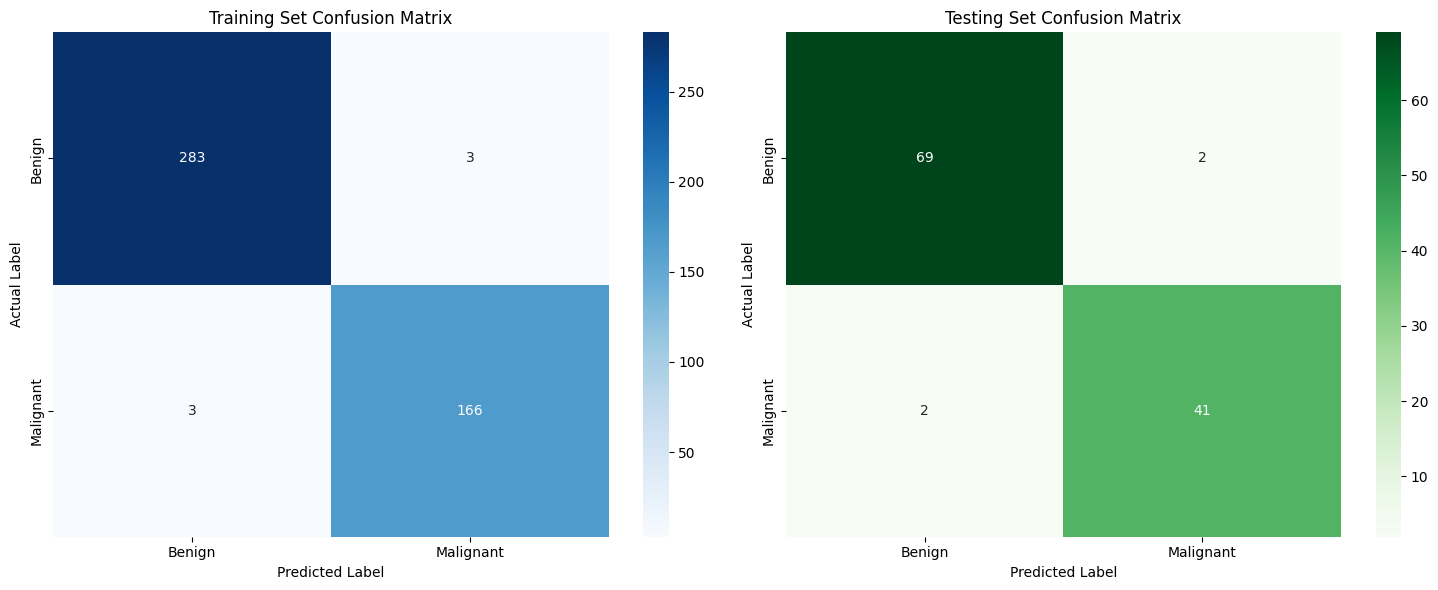

In [19]:
# 1. GENERATE CLASSIFICATION REPORTS
print("="*60)
print("   TRAINING DATA PERFORMANCE (Learning Phase)")
print("="*60)
print(classification_report(y_train, train_pred, target_names=['Benign', 'Malignant']))

print("\n" + "="*60)
print("   TESTING DATA PERFORMANCE (Generalization Phase)")
print("="*60)
print(classification_report(y_test, test_pred, target_names=['Benign', 'Malignant']))

# 2. VISUALIZE CONFUSION MATRICES SIDE-BY-SIDE
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Training Confusion Matrix
cm_train = confusion_matrix(y_train, train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
ax[0].set_title('Training Set Confusion Matrix')
ax[0].set_ylabel('Actual Label')
ax[0].set_xlabel('Predicted Label')

# Testing Confusion Matrix
cm_test = confusion_matrix(y_test, test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=ax[1],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
ax[1].set_title('Testing Set Confusion Matrix')
ax[1].set_ylabel('Actual Label')
ax[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()